In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=953d3f3c04e5466c3f56f7610b30abe0ec7d7faff01ca84fdaa0dbea15bc7cbc
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [3]:
df = load_data('Smarket')
df.head(15)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
5,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
6,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
7,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
8,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
9,2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


<Axes: >

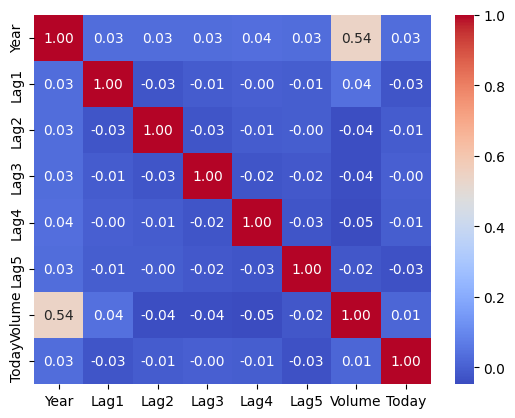

In [4]:
df1 = df[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']]
sns.heatmap(df1.corr(), annot = True, fmt = '2.2f', cmap = 'coolwarm')

[]

<Figure size 1200x1500 with 0 Axes>

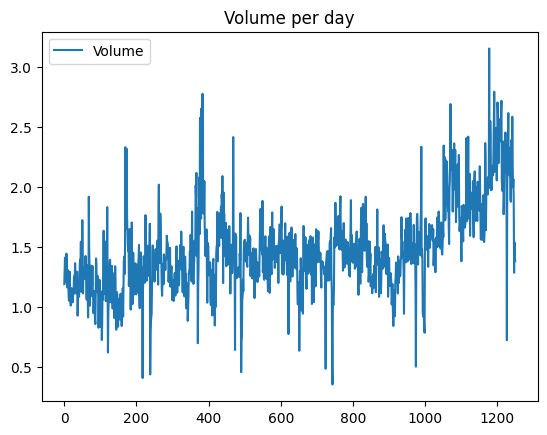

In [5]:
plt.figure(figsize=(12,15))
df.plot(y = 'Volume')
plt.title('Volume per day')
plt.plot()

In [6]:
y = df['Direction'] == 'Up'
X = df.drop(['Today', 'Direction', 'Year'], axis = 1)
design = MS(X)
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
Lag1,-0.0721,0.050,-1.438,0.150
Lag2,-0.0434,0.050,-0.868,0.386
Lag3,0.0100,0.050,0.200,0.842
Lag4,0.0081,0.050,0.162,0.872
Lag5,0.0097,0.049,0.196,0.845
Volume,0.0549,0.037,1.473,0.141


In [7]:
probs = results.predict()
probs[:10]

array([0.51502968, 0.48805685, 0.48458173, 0.52021946, 0.51767349,
       0.51086624, 0.49521645, 0.51173353, 0.52523007, 0.49547214])

In [8]:
labels = np.array(['Down'] * 1250)
labels[probs > 0.5] = 'Up'

In [9]:
confusion_table(labels, df['Direction'])

Truth,Down,Up
Predicted,,
Down,100,93
Up,502,555


In [10]:
diagonal_sum = 100 + 555
total = diagonal_sum + 502 + 93

diagonal_sum/total, np.mean(labels == df['Direction'])

(0.524, 0.524)

In [11]:
train = df['Year'] < 2005
df_train = df.loc[train]
df_test = df.loc[~train]

print(f'The train shape is: {df_train.shape} while the test shape is: {df_test.shape}')

The train shape is: (998, 9) while the test shape is: (252, 9)


In [12]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [13]:
D = df['Direction']
L_train, L_test = D.loc[train], D.loc[~train]

In [14]:
labels = np.array(['Down'] * 252)
labels[probs > 0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,33,26
Up,78,115


In [15]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.5873015873015873, 0.4126984126984127)

THE MODEL IS BETTER THAN RANDOM CHANCE APPROXIMATION

In [16]:
model = MS(['Lag1', 'Lag2']).fit(df)
X = model.transform(df)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)
labels = np.array(['Down'] * 252)
labels[probs > 0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [17]:
(35 + 106)/252, 106/(106+76)

(0.5595238095238095, 0.5824175824175825)

# LDA

In [18]:
#For inspecting covariance matrix
lda = LDA(store_covariance = True)

In [19]:
X_train, X_test = [M.drop(columns=['intercept']) for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [20]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [21]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [22]:
lda.priors_

array([0.49198397, 0.50801603])

In [23]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [24]:
lda_pred = lda.predict(X_test)

In [25]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [26]:
lda_prob = lda.predict_proba(X_test)
np.all(
    np.where(lda_prob[:,1] >= 0.5, 'Up', 'Down') == lda_pred
)

True

For k classes where k > 2

In [27]:
np.all(
    [lda.classes_[i] for i in np.argmax(lda_prob, 1)] == lda_pred
)

True

**Setting a threshold for the posterior probability other than 50% in order to make a prediction**

In [28]:
np.sum(lda_prob[:,0] > 0.9)

0

# QDA

In [29]:
qda = QDA(store_covariance = True)
qda.fit(X_train, L_train)


QuadraticDiscriminantAnalysis(store_covariance=True)

In [30]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [31]:
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [32]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [33]:
np.mean(qda_pred == L_test)

0.5992063492063492

# Naive Bayes

In [34]:
nb = GaussianNB()
nb.fit(X_train, L_train)

GaussianNB()

In [35]:
nb.class_prior_

array([0.49198397, 0.50801603])

In [36]:
nb.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [37]:
nb.var_ #Varianzas

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [38]:
X_train[L_train == 'Down'].mean()

,0
Lag1,0.042790
Lag2,0.033894


In [39]:
nb_labels = nb.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [40]:
nb.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

#KNN

In [41]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)


Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [43]:
(43 + 83)/252, np.mean(knn1_pred == L_test)

(0.5, 0.5)

In [52]:
def train_knn(k:int):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, L_train)
    knn_pred = knn.predict(X_test)
    a = confusion_table(knn_pred, L_test)
    print(confusion_table(knn_pred, L_test))
    return knn, knn_pred


model, preds = train_knn(k=3)

(48 + 86)/252, np.mean(preds == L_test)





Truth      Down  Up
Predicted          
Down         48  55
Up           63  86


(0.5317460317460317, 0.5317460317460317)

In [ ]:

model, preds = train_knn(k=3)

(48 + 86)/252, np.mean(preds == L_test)

# Caravan data

In [54]:
df = load_data('Caravan')
purchase = df['Purchase']
purchase.value_counts(normalize = True)

,proportion
Purchase,
No,0.940227
Yes,0.059773


In [67]:
y = df['Purchase']
X = df.drop('Purchase', axis = 1)

X_train, X_test, L_train, L_test = train_test_split(X, y, train_size=0.8, random_state = 2025, stratify = y)

scaler = StandardScaler(with_mean = True, with_std = True, copy = True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def train_knn(k:int):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, L_train)
    knn_pred = knn.predict(X_test)
    a = confusion_table(knn_pred, L_test)
    print(confusion_table(knn_pred, L_test))
    return knn, knn_pred

model, preds = train_knn(k=1)

print(f'({np.mean(preds != L_test):.3f}, {np.mean(L_test != "No"):.3f})')








Truth        No  Yes
Predicted           
No         1040   65
Yes          55    5
(0.103, 0.060)


In [70]:
for i in range(1,7):
    print('for K: {}'.format(i))
    model, preds = train_knn(i)
    print(f'({np.mean(preds != L_test):.3f}, {np.mean(L_test != "No"):.3f})')
    print('\n')

for K: 1
Truth        No  Yes
Predicted           
No         1040   65
Yes          55    5
(0.103, 0.060)


for K: 2
Truth        No  Yes
Predicted           
No         1084   69
Yes          11    1
(0.069, 0.060)


for K: 3
Truth        No  Yes
Predicted           
No         1077   69
Yes          18    1
(0.075, 0.060)


for K: 4
Truth        No  Yes
Predicted           
No         1090   70
Yes           5    0
(0.064, 0.060)


for K: 5
Truth        No  Yes
Predicted           
No         1086   69
Yes           9    1
(0.067, 0.060)


for K: 6
Truth        No  Yes
Predicted           
No         1095   70
Yes           0    0
(0.060, 0.060)


